In [1]:
#Import necessary Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
import tensorflow
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [3]:
df=pd.read_csv("newstock.csv")

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,08-06-2015,453.399994,455.000000,441.549988,442.725006,425.550629,4958862.0
1,09-06-2015,441.774994,445.325012,438.674988,441.850006,424.709564,4184606.0
2,10-06-2015,443.000000,454.950012,442.500000,452.899994,435.330933,6176034.0
3,11-06-2015,453.000000,454.750000,436.825012,438.575012,421.561676,6709574.0
4,12-06-2015,439.500000,446.350006,439.125000,444.924988,427.665283,9849112.0


In [14]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.shape

(1228, 7)

In [19]:
df_close = df['Close']

In [20]:
df_close.shape

(1228,)

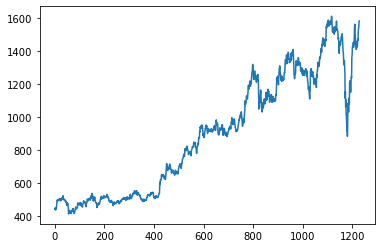

In [21]:
plt.plot(df_close)

In [22]:
# we apply MinMax Scaler to transform our values between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))

In [23]:
df_close.shape

(1228, 1)

In [24]:
df_close

array([[0.02338571],
       [0.0226536 ],
       [0.0318991 ],
       ...,
       [0.94285362],
       [0.97477365],
       [0.97636329]])

In [25]:
#Split the data into train and test split
training_size = int(len(df_close) * 0.75)
test_size = len(df_close) - training_size
train_data, test_data = df_close[0:training_size,:], df_close[training_size:len(df_close),:1]

In [26]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [27]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [28]:
#Reshape the input to be [samples, time steps, features] which is the requirement of LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
#Create the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
13/13 [==============================] - 13s 384ms/step - loss: 0.0539 - val_loss: 0.0217
Epoch 2/100
13/13 [==============================] - 4s 316ms/step - loss: 0.0087 - val_loss: 0.0099
Epoch 3/100
13/13 [==============================] - 4s 321ms/step - loss: 0.0027 - val_loss: 0.0121
Epoch 4/100
13/13 [==============================] - 4s 309ms/step - loss: 0.0018 - val_loss: 0.0132
Epoch 5/100
13/13 [==============================] - 4s 301ms/step - loss: 0.0014 - val_loss: 0.0097
Epoch 6/100
13/13 [==============================] - 4s 303ms/step - loss: 0.0012 - val_loss: 0.0097
Epoch 7/100
13/13 [==============================] - 4s 304ms/step - loss: 0.0012 - val_loss: 0.0095
Epoch 8/100
13/13 [==============================] - 4s 298ms/step - loss: 0.0012 - val_loss: 0.0089
Epoch 9/100
13/13 [==============================] - 4s 295ms/step - loss: 0.0011 - val_loss: 0.0092
Epoch 10/100
13/13 [==============================] - 4s 295ms/step - loss: 0.0010 - val_l

13/13 [==============================] - 4s 297ms/step - loss: 5.2236e-04 - val_loss: 0.0026
Epoch 79/100
13/13 [==============================] - 4s 300ms/step - loss: 5.5781e-04 - val_loss: 0.0059
Epoch 80/100
13/13 [==============================] - 4s 299ms/step - loss: 5.0609e-04 - val_loss: 0.0052
Epoch 81/100
13/13 [==============================] - 4s 300ms/step - loss: 4.9304e-04 - val_loss: 0.0035
Epoch 82/100
13/13 [==============================] - 4s 311ms/step - loss: 4.5589e-04 - val_loss: 0.0046
Epoch 83/100
13/13 [==============================] - 4s 294ms/step - loss: 4.2945e-04 - val_loss: 0.0028
Epoch 84/100
13/13 [==============================] - 4s 295ms/step - loss: 4.7094e-04 - val_loss: 0.0054
Epoch 85/100
13/13 [==============================] - 4s 298ms/step - loss: 4.7717e-04 - val_loss: 0.0038
Epoch 86/100
13/13 [==============================] - 4s 304ms/step - loss: 4.3001e-04 - val_loss: 0.0027
Epoch 87/100
13/13 [==============================] - 4s 29

In [32]:
#Lets predict and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [33]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
#Calculate RMSE performance metrics
math.sqrt(mean_squared_error(y_train, train_predict))

798.3636077875343

In [35]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

1328.5413074507437

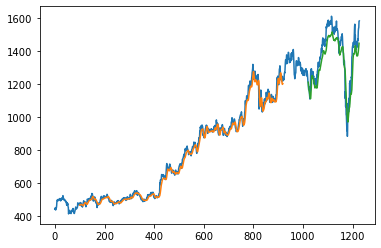

In [36]:
#Plotting

#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(df_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data), x_test.shape

(307, (206, 100, 1))

In [38]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 100)

In [39]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [40]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8916839]
101
1 day input [0.94816663 0.9478738  0.94456879 0.93260407 0.92796036 0.939716
 0.97577765 0.93507229 0.93636921 0.93590899 0.93047045 0.92603602
 0.91348555 0.88436843 0.89114567 0.8609409  0.83408293 0.81220327
 0.84642422 0.86491522 0.87269654 0.85249028 0.8541218  0.86847118
 0.88315526 0.88637653 0.89763007 0.88980697 0.88072882 0.91118463
 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079 0.76463703
 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139 0.5851654
 0.6181313  0.5423683  0.57776065 0.50279251 0.49634993 0.46330038
 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569
 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997
 0.65042781 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661
 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714
 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529
 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462
 0.87403524 0.85843081 0.83178201 0.85

9 day output [[0.7633699]]
10 day input [0.93590899 0.93047045 0.92603602 0.91348555 0.88436843 0.89114567
 0.8609409  0.83408293 0.81220327 0.84642422 0.86491522 0.87269654
 0.85249028 0.8541218  0.86847118 0.88315526 0.88637653 0.89763007
 0.88980697 0.88072882 0.91118463 0.8962495  0.8619449  0.83805724
 0.8176418  0.81283079 0.76463703 0.75417831 0.7765181  0.77388248
 0.74999482 0.71640139 0.5851654  0.6181313  0.5423683  0.57776065
 0.50279251 0.49634993 0.46330038 0.42079615 0.50467508 0.39264125
 0.44229929 0.55847473 0.54504569 0.54454369 0.51513375 0.5848307
 0.55696863 0.55445854 0.6620997  0.65042781 0.67368794 0.64791772
 0.61503546 0.63026342 0.67707661 0.69364326 0.6882465  0.79387957
 0.7999875  0.83855924 0.84922714 0.84788844 0.84688434 0.86803608
 0.84250843 0.86360165 0.86368529 0.90198096 0.9474387  0.95987202
 0.87902192 0.90503482 0.85441462 0.87403524 0.85843081 0.83178201
 0.85253205 0.85884916 0.85073323 0.844458   0.862447   0.88478678
 0.87821873 0.92503192 

18 day output [[0.6918644]]
19 day input [0.84642422 0.86491522 0.87269654 0.85249028 0.8541218  0.86847118
 0.88315526 0.88637653 0.89763007 0.88980697 0.88072882 0.91118463
 0.8962495  0.8619449  0.83805724 0.8176418  0.81283079 0.76463703
 0.75417831 0.7765181  0.77388248 0.74999482 0.71640139 0.5851654
 0.6181313  0.5423683  0.57776065 0.50279251 0.49634993 0.46330038
 0.42079615 0.50467508 0.39264125 0.44229929 0.55847473 0.54504569
 0.54454369 0.51513375 0.5848307  0.55696863 0.55445854 0.6620997
 0.65042781 0.67368794 0.64791772 0.61503546 0.63026342 0.67707661
 0.69364326 0.6882465  0.79387957 0.7999875  0.83855924 0.84922714
 0.84788844 0.84688434 0.86803608 0.84250843 0.86360165 0.86368529
 0.90198096 0.9474387  0.95987202 0.87902192 0.90503482 0.85441462
 0.87403524 0.85843081 0.83178201 0.85253205 0.85884916 0.85073323
 0.844458   0.862447   0.88478678 0.87821873 0.92503192 0.9378752
 0.94285362 0.97477365 0.97636329 0.89168388 0.88630241 0.87269533
 0.85638851 0.83981699 0

26 day output [[0.64654666]]
27 day input [0.89763007 0.88980697 0.88072882 0.91118463 0.8962495  0.8619449
 0.83805724 0.8176418  0.81283079 0.76463703 0.75417831 0.7765181
 0.77388248 0.74999482 0.71640139 0.5851654  0.6181313  0.5423683
 0.57776065 0.50279251 0.49634993 0.46330038 0.42079615 0.50467508
 0.39264125 0.44229929 0.55847473 0.54504569 0.54454369 0.51513375
 0.5848307  0.55696863 0.55445854 0.6620997  0.65042781 0.67368794
 0.64791772 0.61503546 0.63026342 0.67707661 0.69364326 0.6882465
 0.79387957 0.7999875  0.83855924 0.84922714 0.84788844 0.84688434
 0.86803608 0.84250843 0.86360165 0.86368529 0.90198096 0.9474387
 0.95987202 0.87902192 0.90503482 0.85441462 0.87403524 0.85843081
 0.83178201 0.85253205 0.85884916 0.85073323 0.844458   0.862447
 0.88478678 0.87821873 0.92503192 0.9378752  0.94285362 0.97477365
 0.97636329 0.89168388 0.88630241 0.87269533 0.85638851 0.83981699
 0.82366335 0.80644494 0.79058236 0.77625251 0.76336992 0.7518366
 0.7415424  0.73235327 0.724

In [41]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [42]:
df3 = df_close.tolist()
df3.extend(lst_output)

In [43]:
len(df_close)

1228

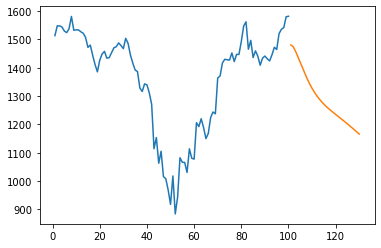

In [44]:
plt.plot(day_new, scaler.inverse_transform(df_close[1128:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))